In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

import os
import time
import itertools

from glove.mse_model import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2kwx9d_i because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_DSM27147_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_MS014_processed.csv']

# fit gLV models

In [3]:
def plot(df):

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # increase evaluation time
        t_eval = np.linspace(t_span[0], t_span[-1])

        # predict 
        pred, stdv = model.predict(Y_m, t_eval)

        plt.figure(figsize=(9, 6))
        for i, s in enumerate(species):
            if Y_m[0,i] > 0:
                plt.scatter(t_span, Y_m[:,i], label="True species " + s, color='C{}'.format(i), marker='o', s=75)
                plt.plot(t_eval, pred[:,i], label="Predicted species " + s, color='C{}'.format(i))
                plt.fill_between(t_eval, pred[:,i]-stdv[:,i], pred[:,i]+stdv[:,i], color='C{}'.format(i), alpha=0.2)

        plt.legend()
        plt.xlabel("Time", fontsize=16)
        plt.ylabel("Abundance", fontsize=16)
        exp_name, passage_num = exp.split("_")
        plt.title(f"{exp_name} passage {passage_num} predictions")
        # plt.savefig(f"figures/{exp}.png")
        plt.show()

Total samples: 63, Updated regularization: 1.00e-05
Loss: 17.595, Residuals: 0.049
Loss: 10.667, Residuals: 0.022
Loss: 7.690, Residuals: -0.056
Loss: 7.487, Residuals: -0.070
Loss: 7.111, Residuals: -0.060
Loss: 6.571, Residuals: -0.030
Loss: 6.104, Residuals: -0.032
Loss: 6.019, Residuals: -0.026
Loss: 5.964, Residuals: -0.021
Loss: 5.889, Residuals: -0.014
Loss: 5.876, Residuals: -0.016
Loss: 5.851, Residuals: -0.018
Loss: 5.807, Residuals: -0.021
Loss: 5.804, Residuals: -0.011
Loss: 5.777, Residuals: -0.015
Loss: 5.728, Residuals: -0.021
Loss: 5.728, Residuals: -0.021
Loss: 5.721, Residuals: -0.019
Loss: 5.711, Residuals: -0.018
Loss: 5.691, Residuals: -0.021
Loss: 5.691, Residuals: -0.021
Loss: 5.690, Residuals: -0.020
Loss: 5.665, Residuals: -0.021
Loss: 5.665, Residuals: -0.022
Loss: 5.664, Residuals: -0.021
Loss: 5.663, Residuals: -0.020
Loss: 5.655, Residuals: -0.019
Loss: 5.639, Residuals: -0.021
Loss: 5.639, Residuals: -0.021
Loss: 5.638, Residuals: -0.019
Loss: 5.613, Resid

Loss: 249.828, Residuals: -0.013
Loss: 249.827, Residuals: -0.013
Loss: 249.827, Residuals: -0.013
Loss: 249.827, Residuals: -0.013
Loss: 249.827, Residuals: -0.013
Loss: 249.827, Residuals: -0.013
Evidence 812.820
Pass count  1
Elapsed time 126.46s


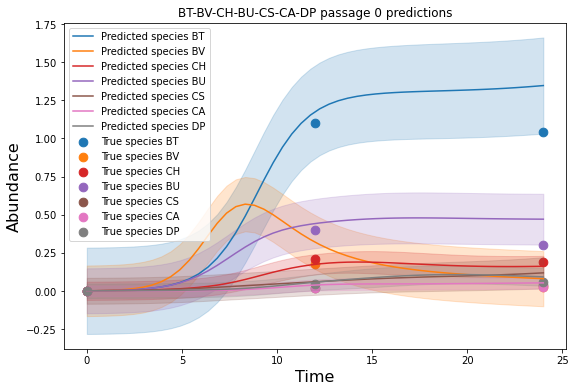

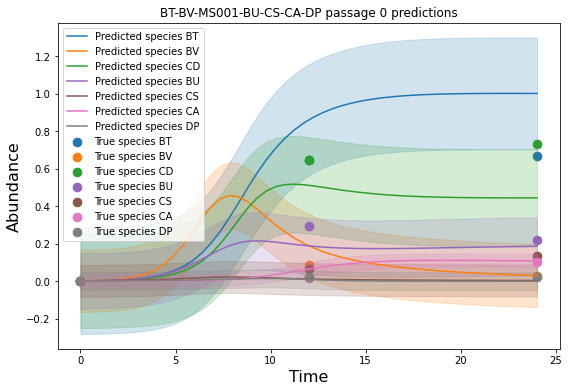

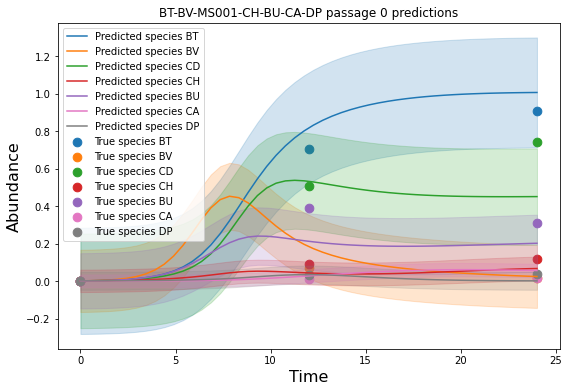

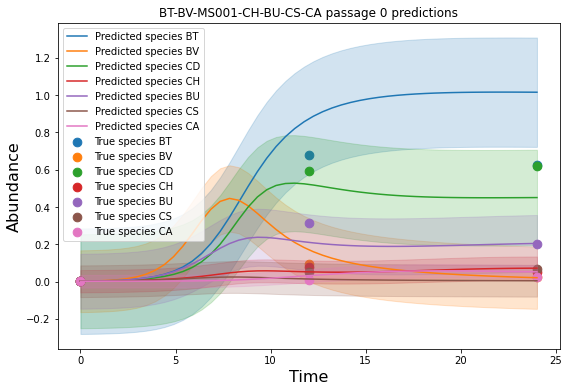

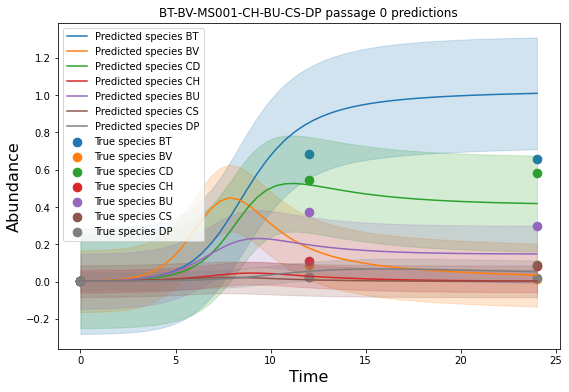

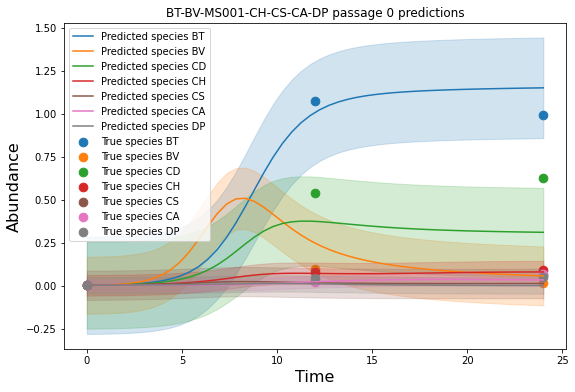

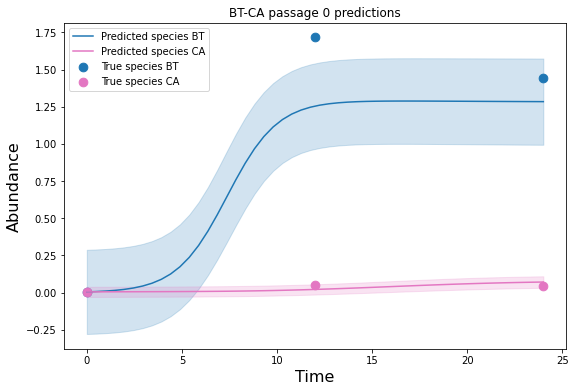

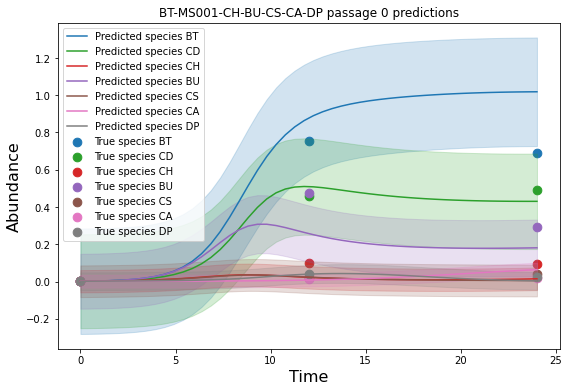

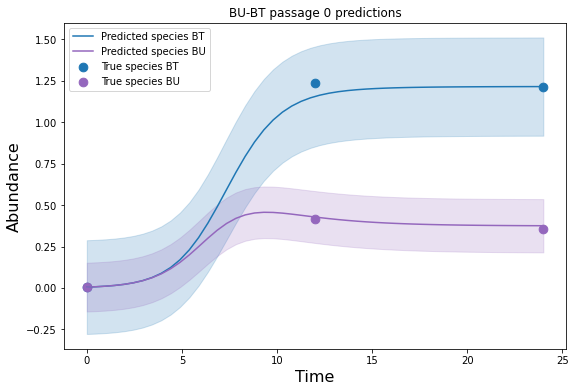

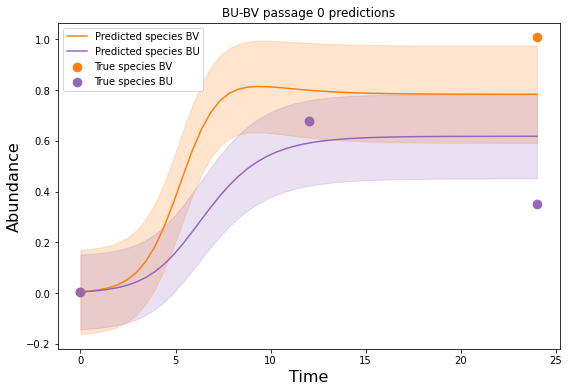

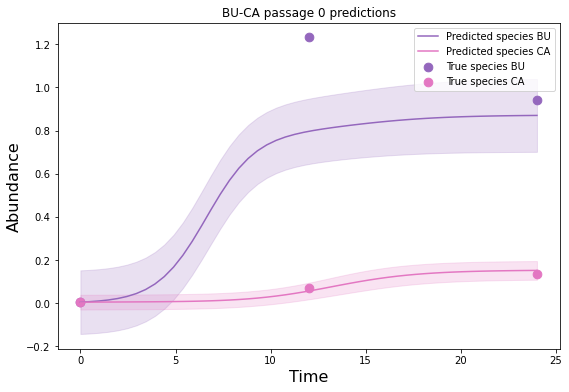

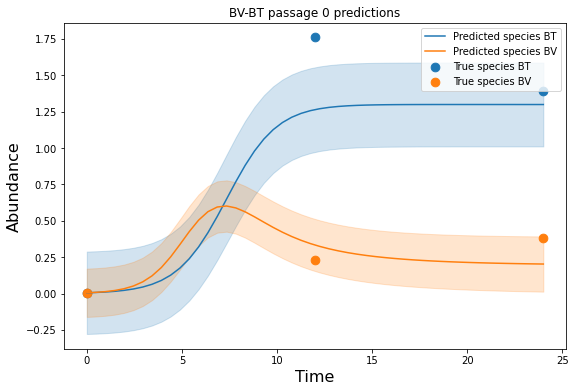

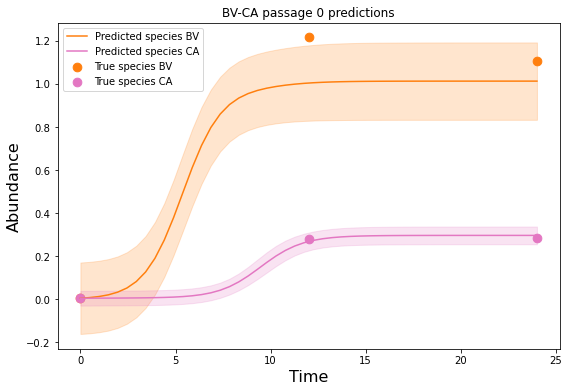

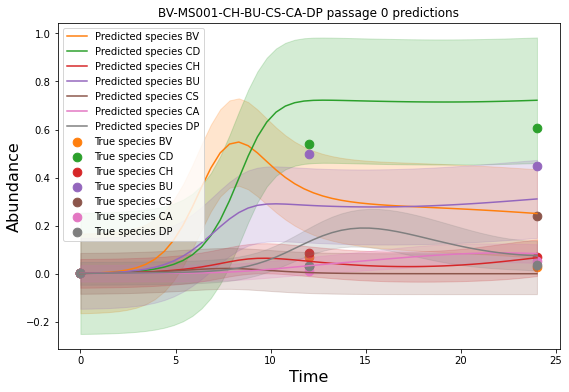

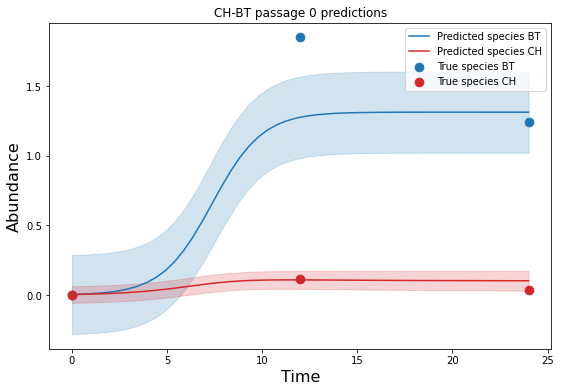

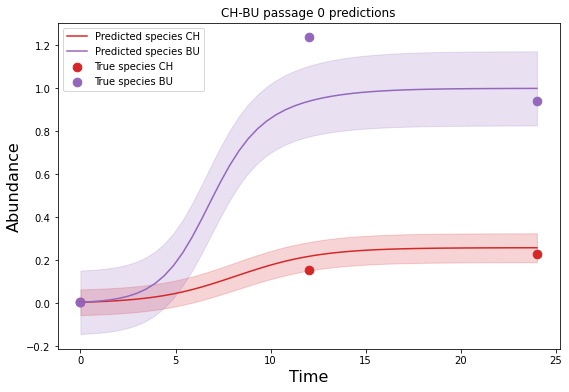

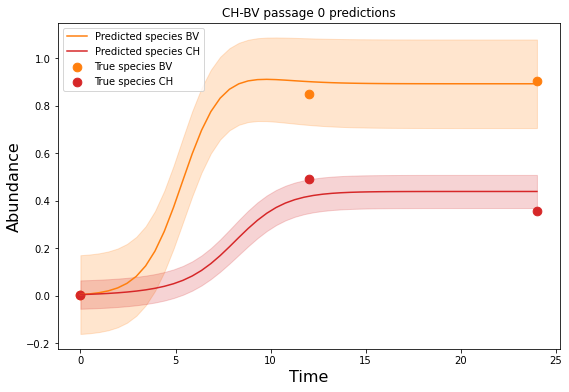

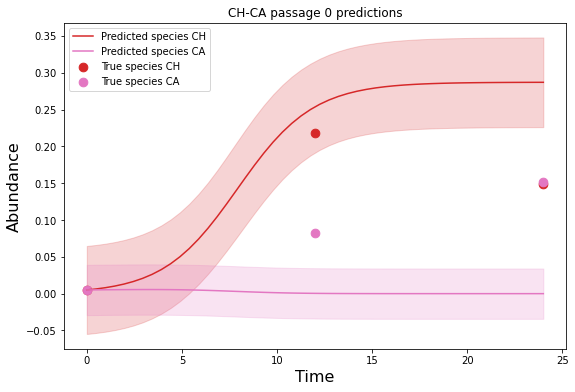

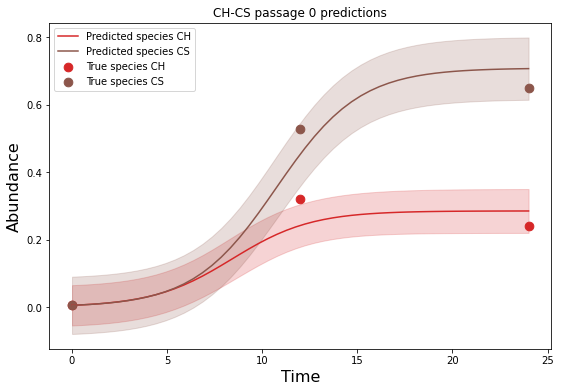

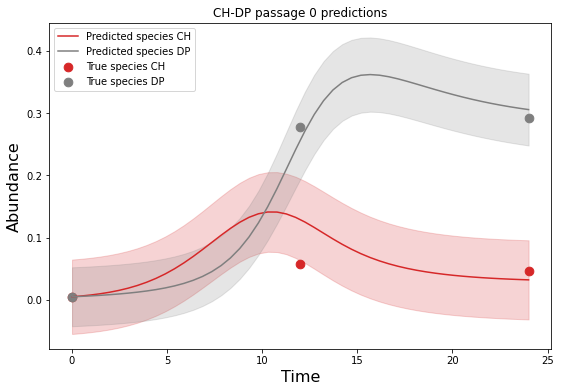

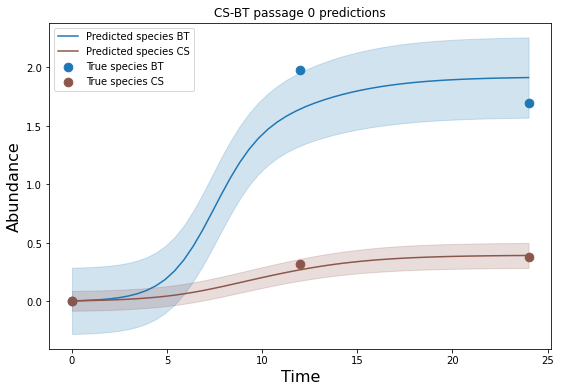

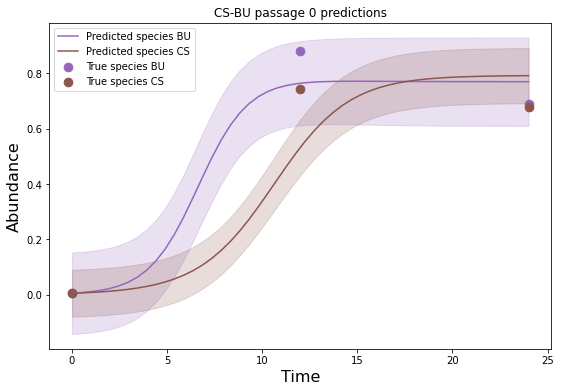

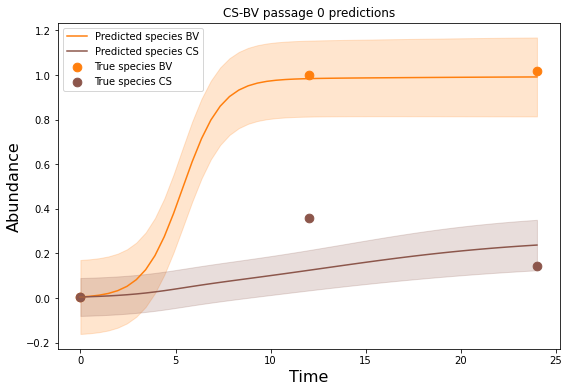

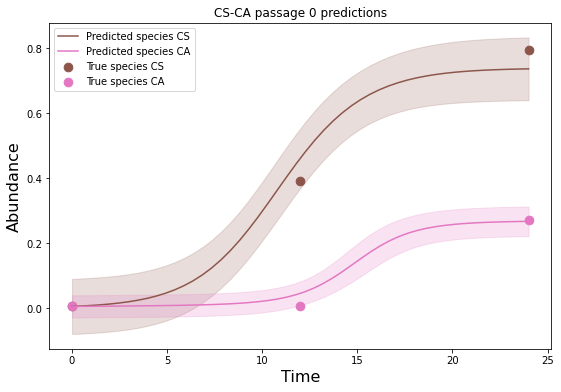

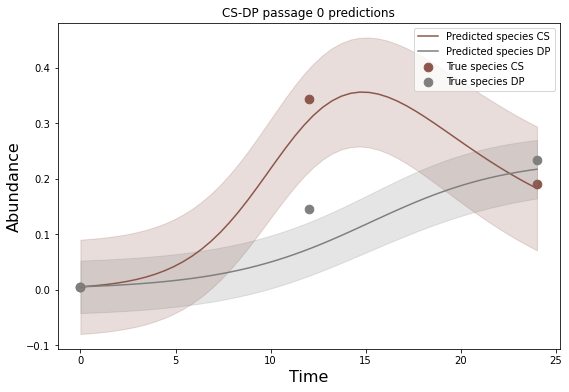

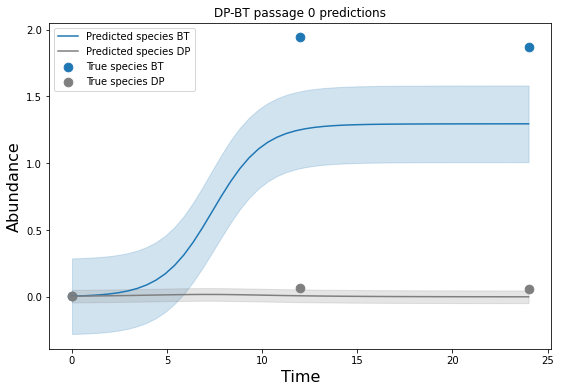

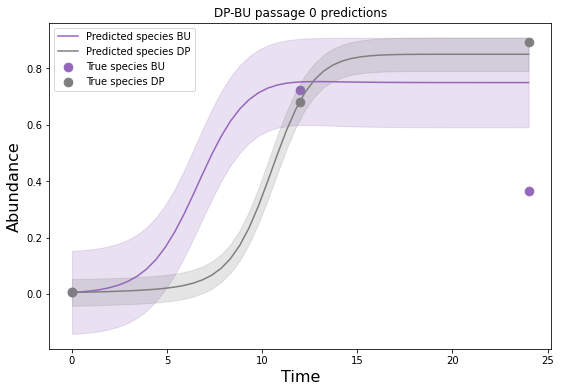

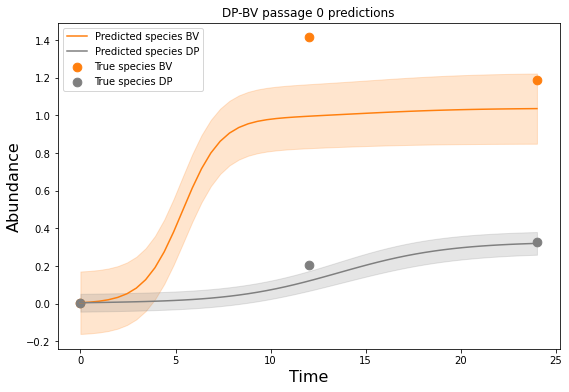

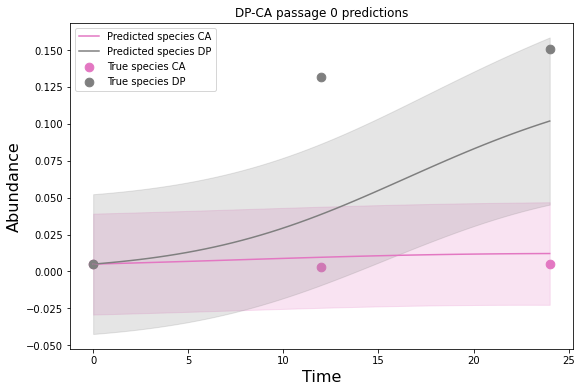

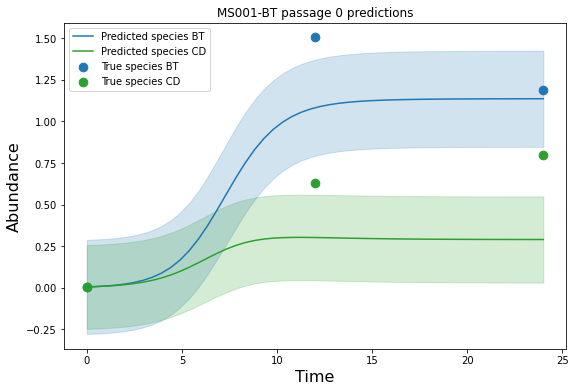

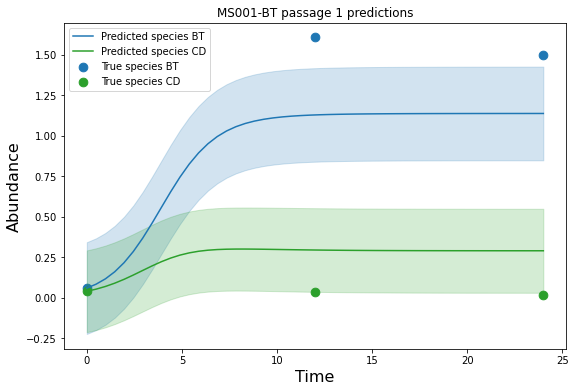

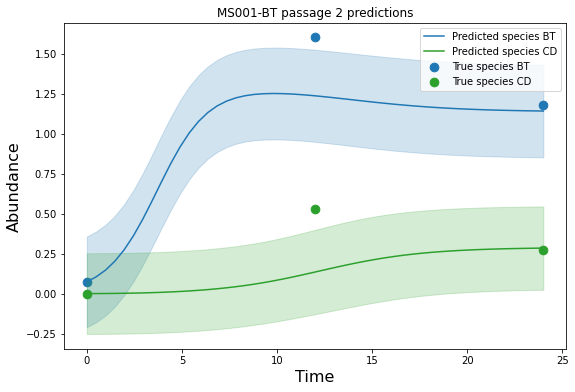

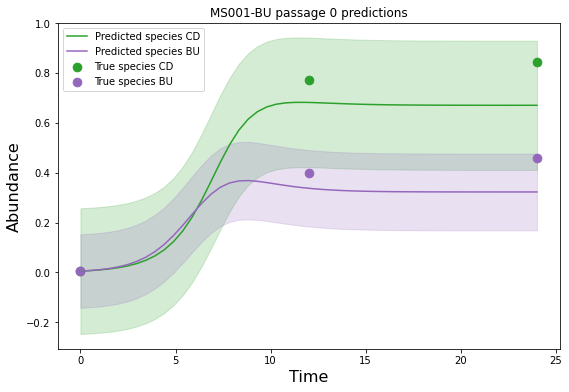

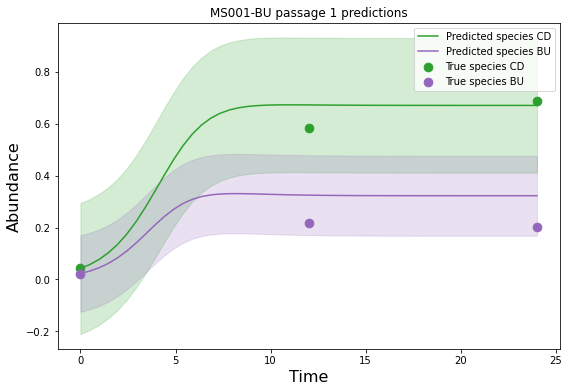

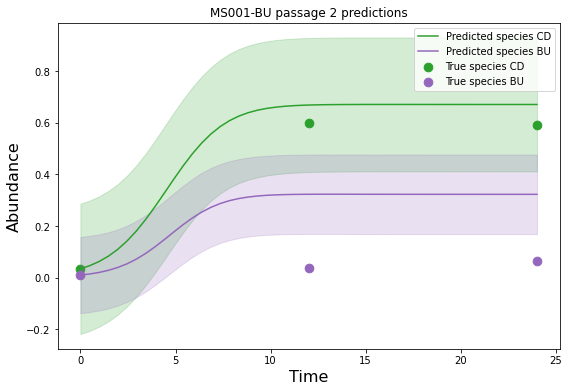

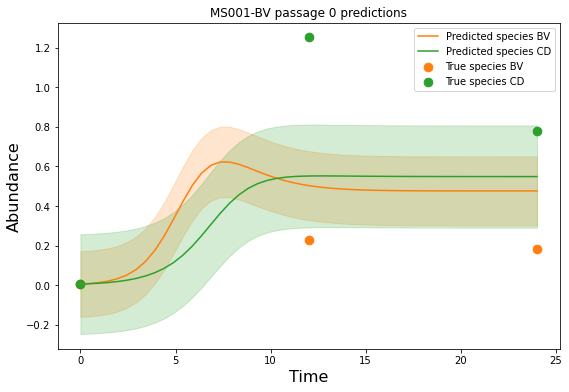

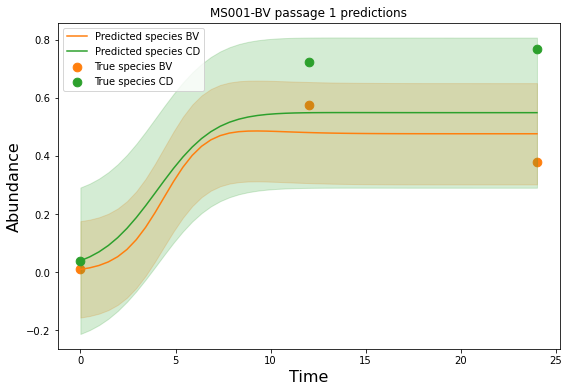

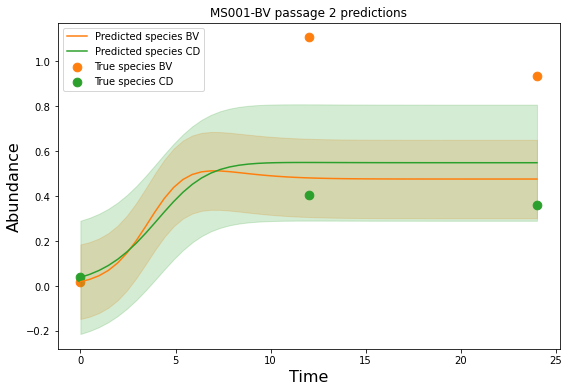

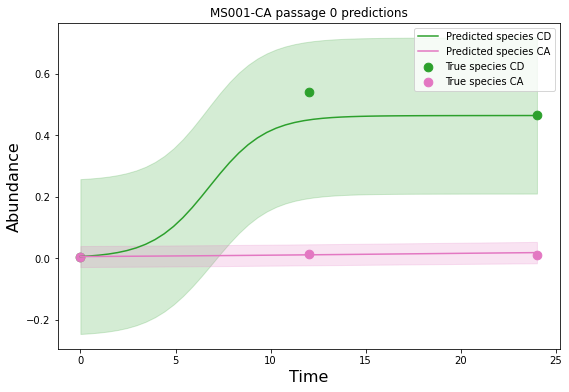

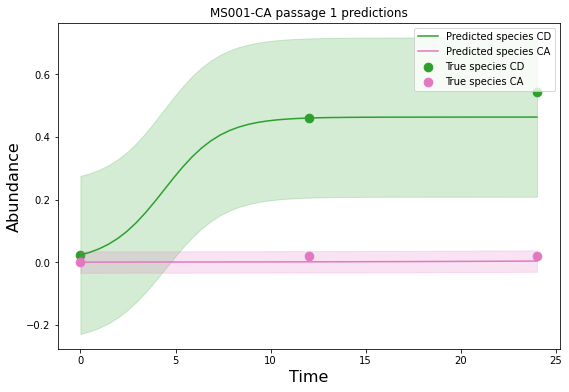

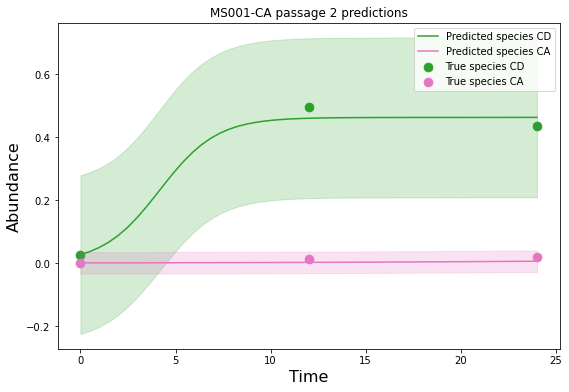

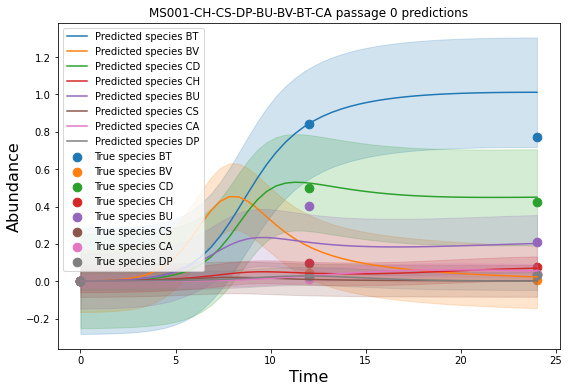

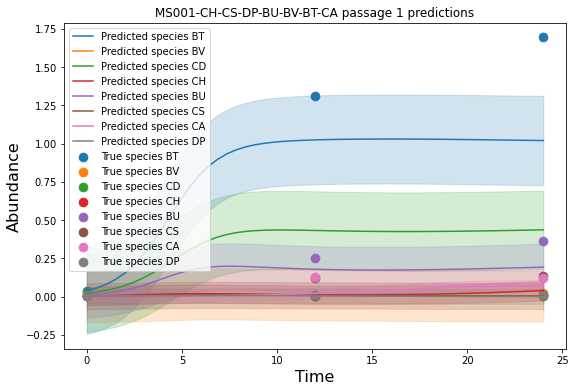

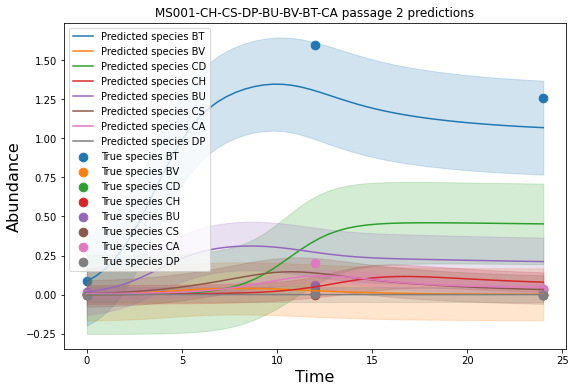

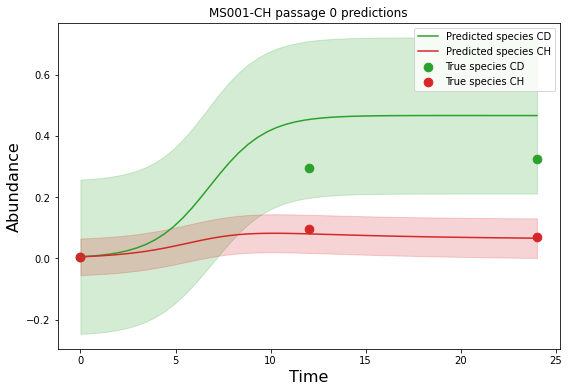

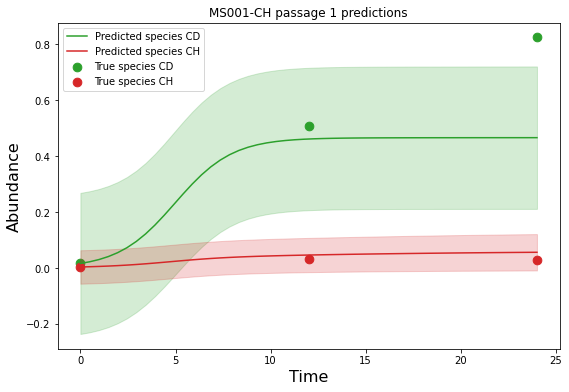

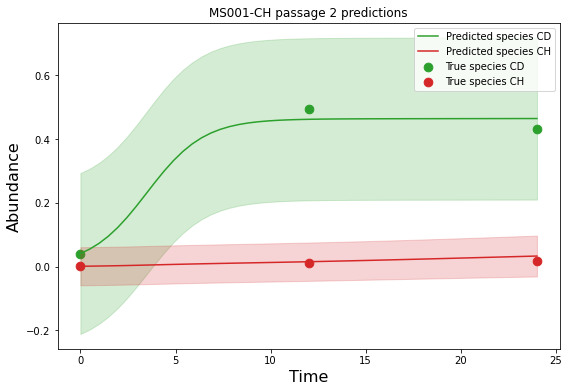

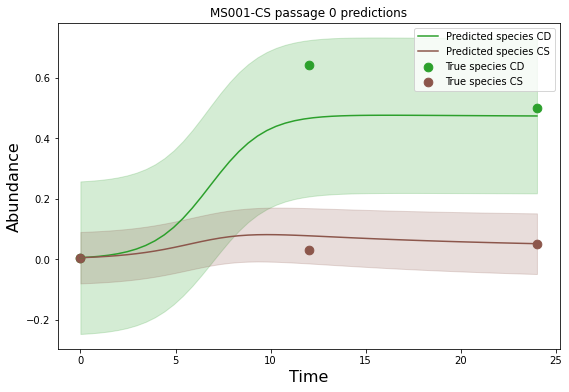

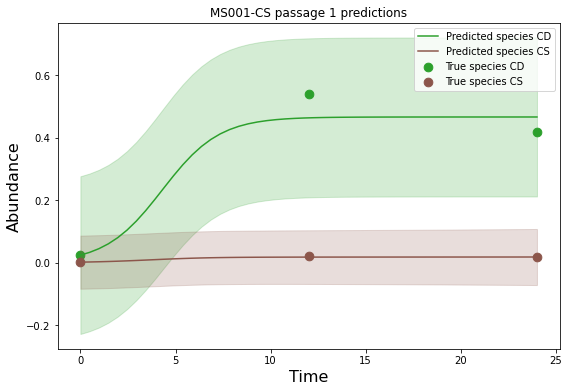

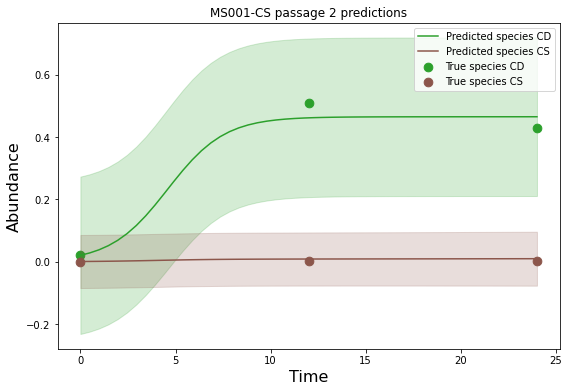

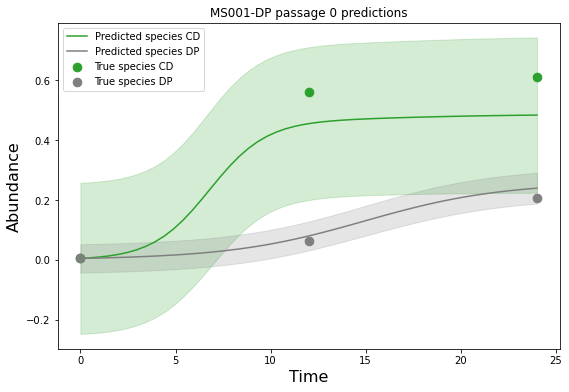

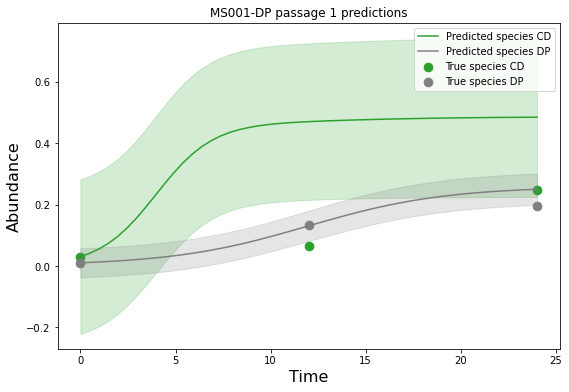

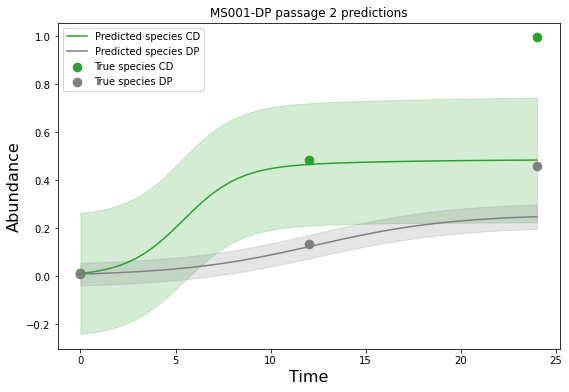

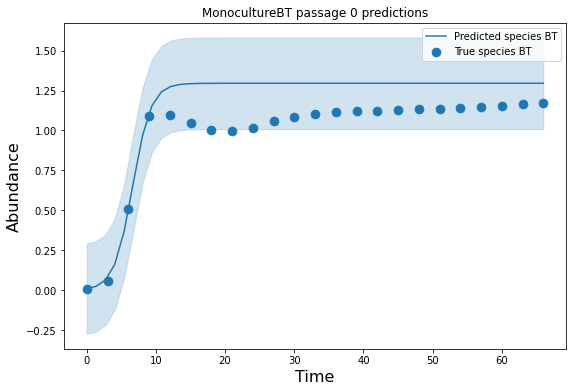

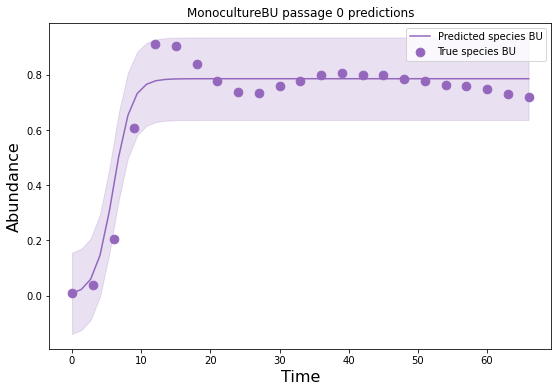

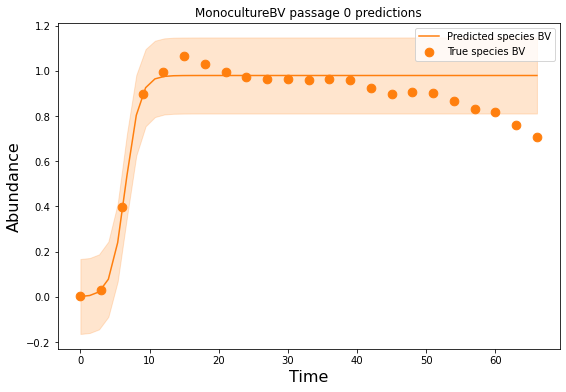

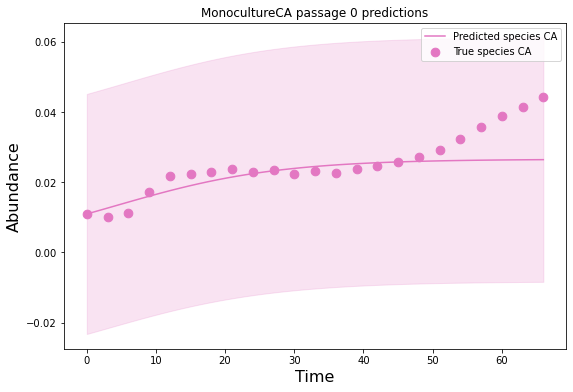

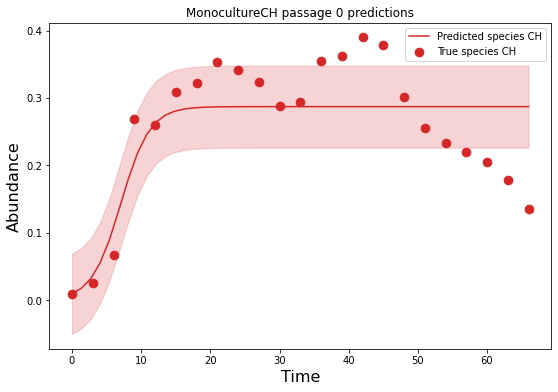

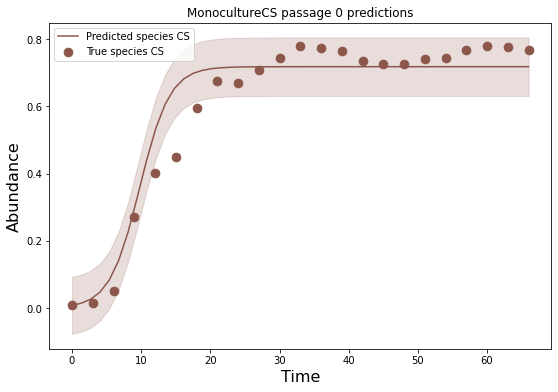

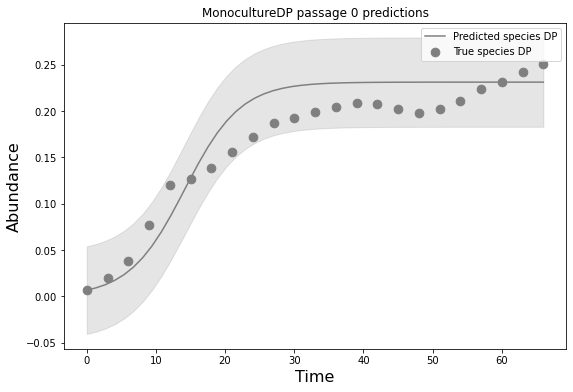

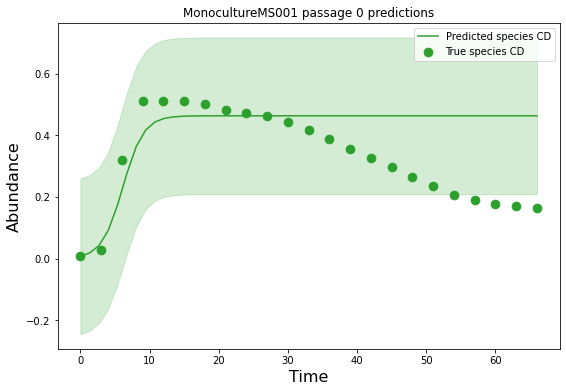

In [4]:
# import data
df = pd.read_csv(f"data/{files[0]}")

# determine species names 
species = df.columns.values[2:]

# instantiate gLV fit 
model = gLV(species, df) 

# fit to data 
t0 = time.time()
model.fit()
print("Elapsed time {:.2f}s".format(time.time()-t0))

# plot fitness to data
plot(df)